In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load Reuter News Dataset
from keras.datasets import reuters

# Bring 10,000 most popular word data
(train_data, train_labels),(test_data,test_labels) = reuters.load_data(num_words=1000)

In [8]:
train_data.shape

(8982,)

In [9]:
test_data.shape

(2246,)

In [10]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 2,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 2,
 2,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 2,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [14]:
word_index = reuters.get_word_index()
# put '[(value, key) for (key, value) in word_index.items()]' as dictionary type
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [15]:
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [16]:
decoded_newswire

'? ? ? said as a result of its december acquisition of ? co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and ? ? revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash ? per share this year should be 2 50 to three dlrs reuter 3'

In [17]:
train_labels[0]

3

In [20]:
# Set up the Data to use
def vectorize_sequences(sequences, dimesion=10000):
    
    results = np.zeros((len(sequences),dimesion))
    
    for i, sequences in enumerate(sequences):
        results[i,sequences] = 1
        
    
    return results    

In [21]:
# Data Encoding
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [22]:
# Compare to project before
# Previous project(IMBD) has only 0 & 1 as label values
# But this Reuter data has various label value
# Therefore, need to build function for label data encoding

In [23]:
# Label Data Encoding
def to_one_hot(labels, dimension=46):# dimension is 46 because there is 46 categories
    results = np.zeros((len(labels),dimension))
    
    for i, sequences in enumerate(labels):
        results[i,sequences] = 1
        
    return results    

In [24]:
# Label Data Encoding
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [25]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [26]:
print(one_hot_test_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [31]:
# From the above
# It is possible to use 
# to_one_hot function for label data encoding
# BUT THERE IS EASIER(+Better!!!) WAY
# BY using to_categorical
# It is little different from function above
# But it is okay to use

In [32]:

from keras.utils.np_utils import to_categorical

In [33]:
one_hot_test_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [34]:
print(one_hot_test_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [37]:
# Build Neural Network
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46, activation='softmax')) # using softmax for multi

# Later see if 64 layers are enough or not(by increasing the number)
# with layers.Dense(4), both training and validation accuracy drop down
# with layers.Dense(1000), it shows similar testing result as 64
# but takes longer time....
# It is important to find the best optimizing number
# Bigger or smaller is not always good...


In [38]:
# check what we build above
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                640064    
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Compile the Data

model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
# Divde the Data 

x_validation = x_train[:1000]
x_train_left = x_train[1000:]

y_validation = one_hot_train_labels[:1000]
y_train_left = one_hot_train_labels[1000:]

In [42]:
history = model.fit(x_train_left, y_train_left, 
                    epochs=20, batch_size=512, 
                    validation_data=(x_validation, y_validation))

Epoch 1/20
16/16 [==============================] - 1s 35ms/step - loss: 2.7978 - accuracy: 0.4996 - val_loss: 1.9257 - val_accuracy: 0.5950
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.6575 - accuracy: 0.6478 - val_loss: 1.4579 - val_accuracy: 0.6670
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.3336 - accuracy: 0.7072 - val_loss: 1.2709 - val_accuracy: 0.7070
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 1.1662 - accuracy: 0.7443 - val_loss: 1.1663 - val_accuracy: 0.7340
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0528 - accuracy: 0.7706 - val_loss: 1.1018 - val_accuracy: 0.7620
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.9591 - accuracy: 0.7885 - val_loss: 1.0506 - val_accuracy: 0.7650
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8835 - accuracy: 0.8022 - val_loss: 1.0127 - val_accuracy: 0.7720
Epoch 8/20
16

In [43]:
# Train Result!

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

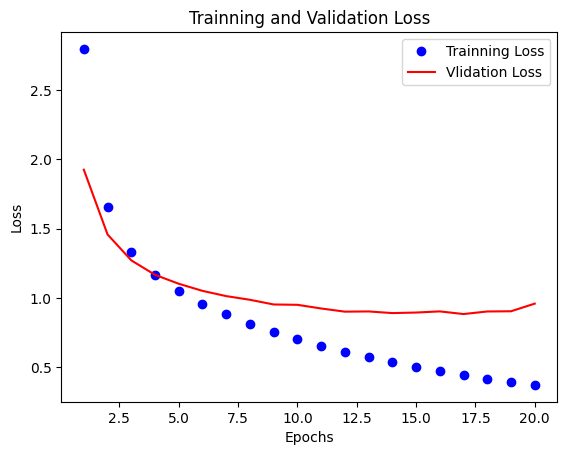

In [45]:
# Data Visualization
# Check the Loss and Validation Loss
plt.plot(epochs, loss, 'bo', label='Trainning Loss')
plt.plot(epochs, val_loss, 'r-', label='Vlidation Loss')
plt.title('Trainning and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

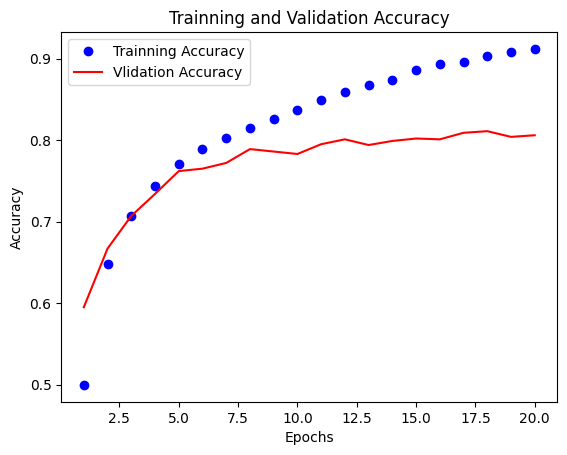

In [46]:
# Check the Accuracy and Valication Accuracy
plt.plot(epochs, acc, 'bo', label='Trainning Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Vlidation Accuracy')
plt.title('Trainning and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()